In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
passengers = pd.read_csv("data/passengers.csv", index_col=['Month'])

In [7]:
passengers.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [8]:
passengers.index = pd.to_datetime(passengers.index)

In [9]:
passengers = pd.read_csv("data/passengers.csv", index_col = 'Month', parse_dates = True)
passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
passengers['1949-08':'1950-03']

,#Passengers
Month,
1949-08-01,148
1949-09-01,136
1949-10-01,119
1949-11-01,104
1949-12-01,118
1950-01-01,115
1950-02-01,126
1950-03-01,141


In [13]:
# изменим шаг наших данных; например, посмотрим средние данные по годам
passengers.resample(rule = 'AS').mean().head()

,#Passengers
Month,
1949-01-01,126.666667
1950-01-01,139.666667
1951-01-01,170.166667
1952-01-01,197.000000
1953-01-01,225.000000


In [14]:
# произведем сдвиг на два периода (в данном случае месяца) вперед
passengers.shift(2, axis = 0).head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,112.0
1949-04-01,118.0
1949-05-01,132.0


In [15]:
# рассчитаем скользящее среднее для трех предыдущих месяцев
passengers.rolling(window=3).mean().head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,120.666667
1949-04-01,126.333333
1949-05-01,127.333333


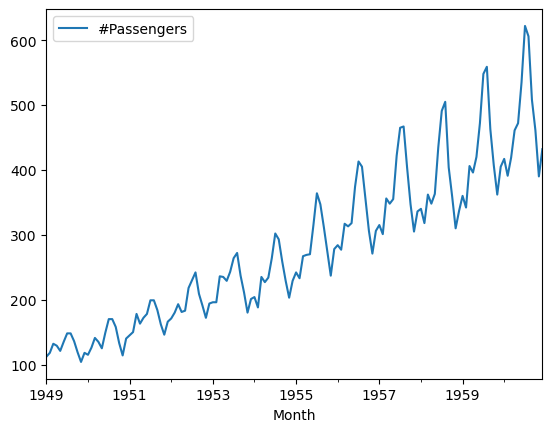

In [17]:
passengers.plot();

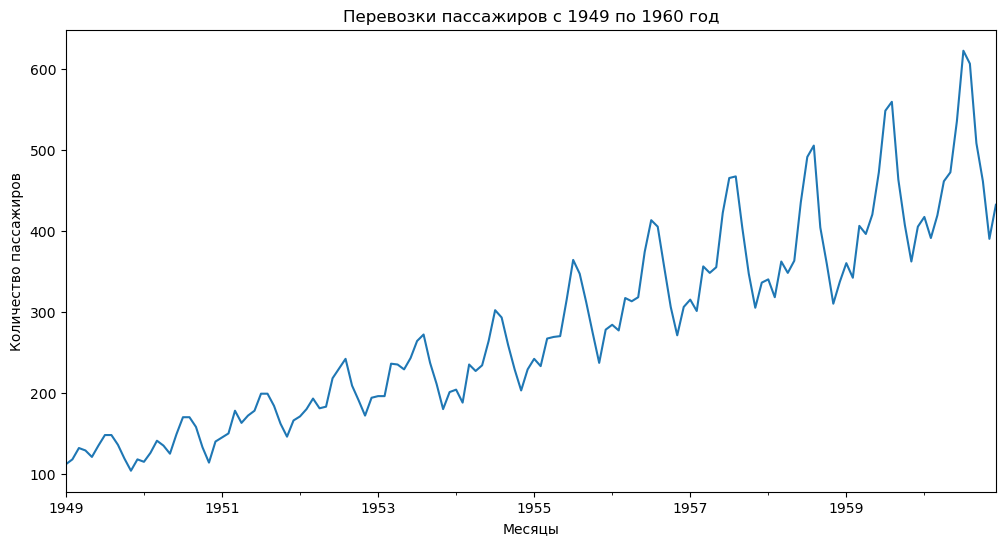

In [18]:
# изменим размер графика, уберем легенду и добавим подписи
ax = passengers.plot(figsize = (12,6), legend = None)
ax.set(title = 'Перевозки пассажиров с 1949 по 1960 год', xlabel = 'Месяцы', ylabel = 'Количество пассажиров');

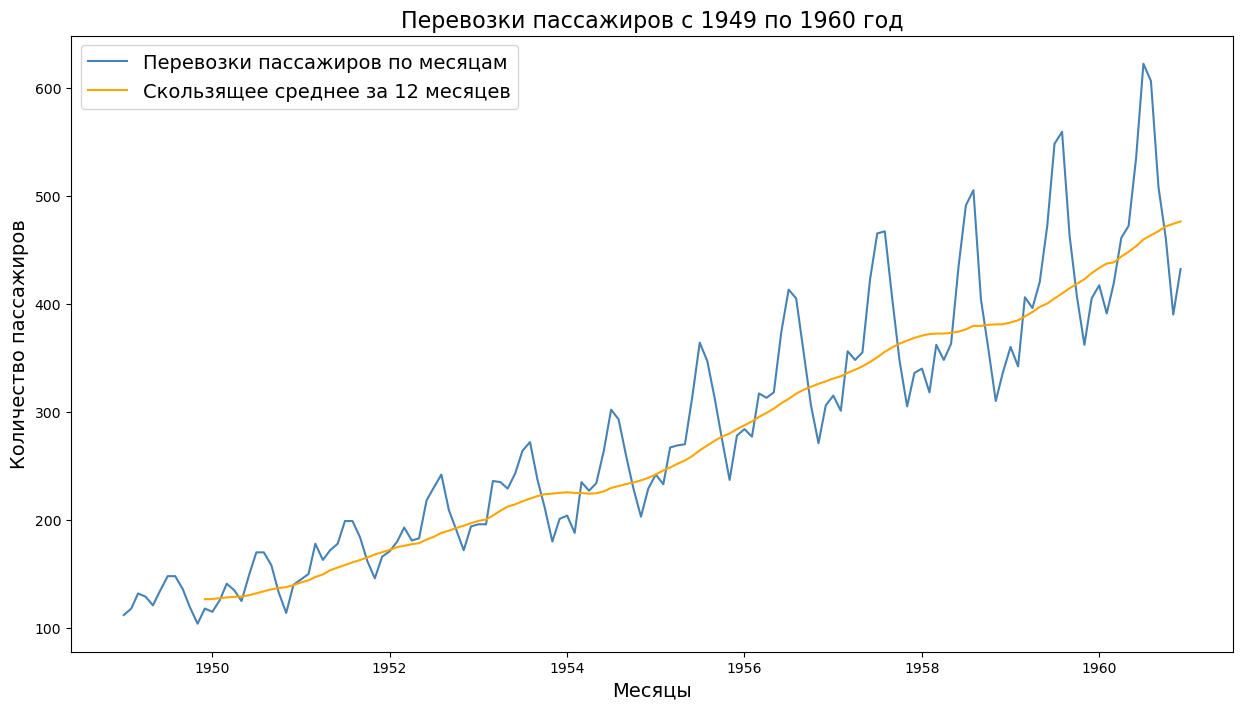

In [21]:
# теперь воспользуемся библиотекой matplotlib для построения сразу двух графиков

# зададим размер графика
plt.figure(figsize = (15,8))

# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(passengers, label = 'Перевозки пассажиров по месяцам', color = 'steelblue')
plt.plot(passengers.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Количество пассажиров', fontsize = 14)
plt.title('Перевозки пассажиров с 1949 по 1960 год', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

In [93]:
births = pd.read_csv("data/births.csv", index_col = 'Date',parse_dates=True)
births.head(3)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30


In [121]:
passengers

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


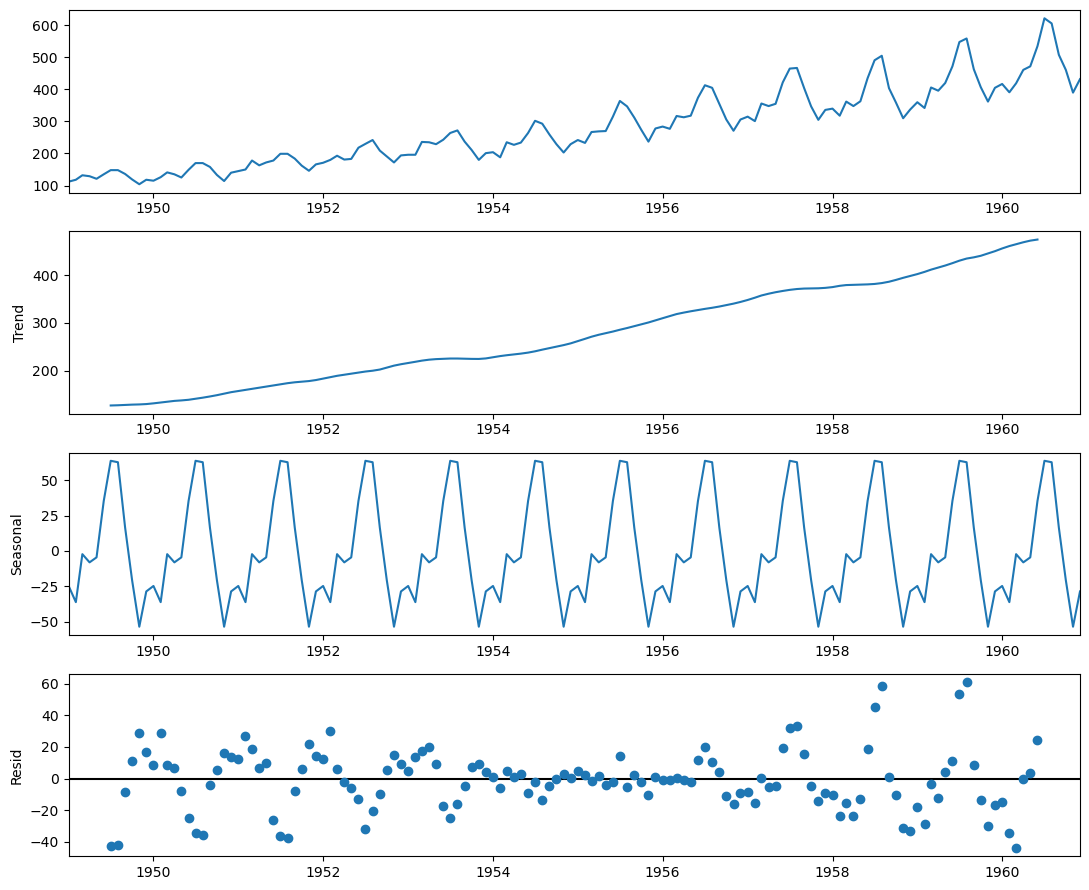

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams

rcParams['figure.figsize'] = 11,9

decompose_p = seasonal_decompose(passengers)
decompose_p.plot()

plt.show()

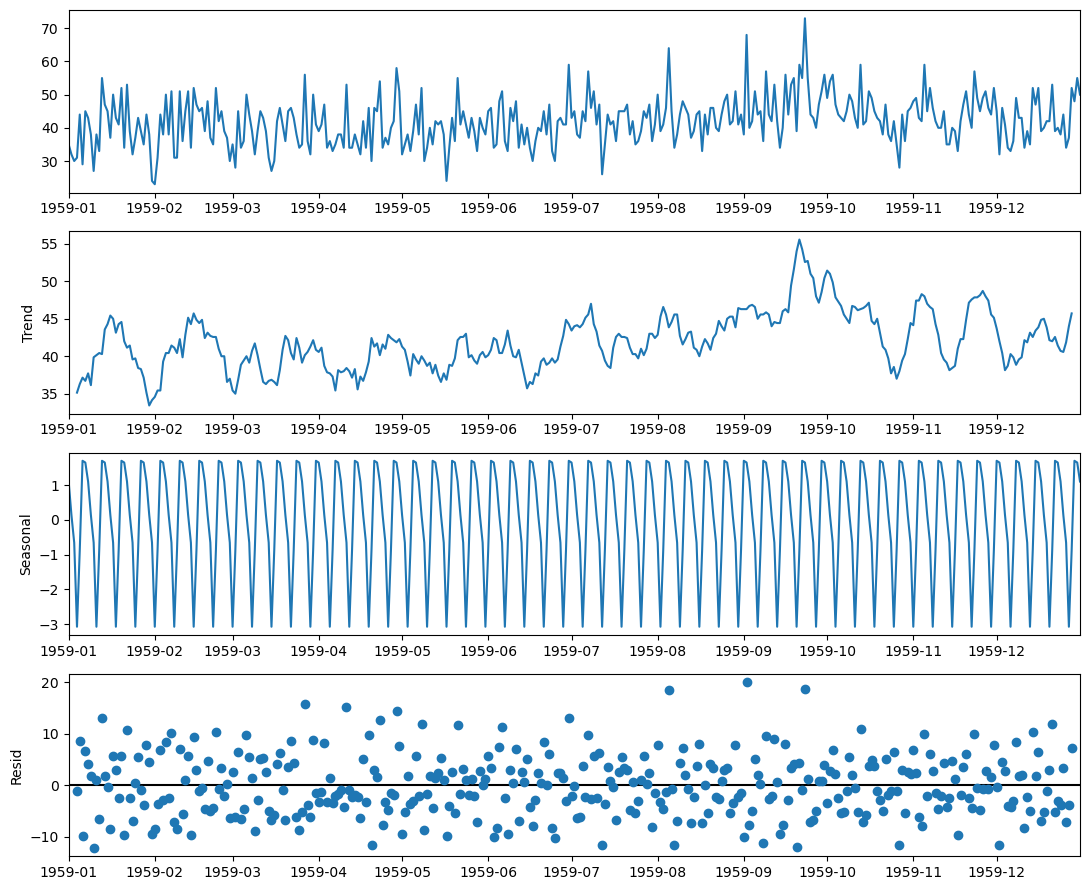

In [28]:
decompose_b = seasonal_decompose(births)
decompose_b.plot()

plt.show()

In [31]:
# проведем тест Дики-Фуллера (Dickey-Fuller test)

# импортируем необходимую функцию 
from statsmodels.tsa.stattools import adfuller

# передадим ей столбец с данными о перевозках и поместим результат в adf_test
adf_test = adfuller(passengers['#Passengers'])

# выведем p-value
print('p-value = ' + str(adf_test[1])) #не стационарные данные

p-value = 0.991880243437641


In [32]:
# теперь посмотрим на данные о рождаемости
adf_test = adfuller(births['Births'])

# выведем p-value
print('p-value = ' +str(adf_test[1])) # стационарные данные

p-value = 5.243412990149882e-05


In [36]:
# для начала возьмем искусственные данные
data = np.array([16, 21, 15, 24, 18, 17, 20])

# для сдвига на одно значение достаточно взять этот ряд, начиная со второго элемента
lag_1 = data[1:]

# посчитаем корреляцию для лага 1 (у исходных данных мы убрали последний элемент)
# так как мы получим коррелационную матрицу, возьмем первую строку и второй столбец [0, 1]
np.round(np.corrcoef(data[:-1], lag_1)[0,1], 2)

-0.71

Text(0.5, 1.0, 'Автокорреляция с лагом 1')

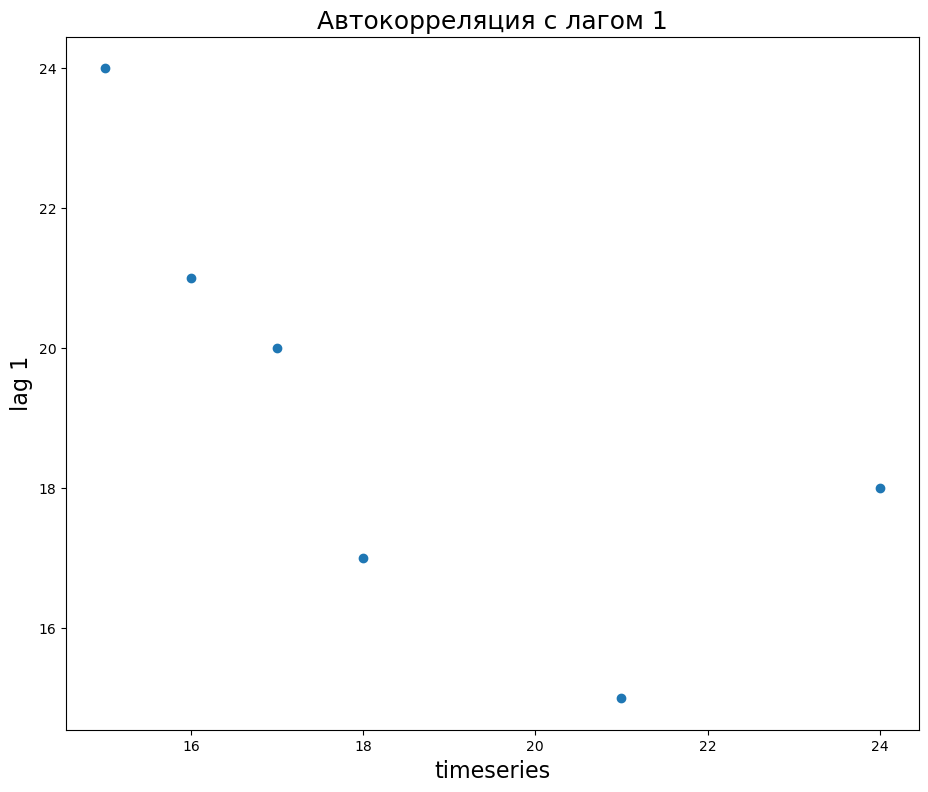

In [35]:
# построим точечную диаграмму
plt.scatter(data[:-1], lag_1)
 
# добавим подписи
plt.xlabel('timeseries', fontsize = 16)
plt.ylabel('lag 1', fontsize = 16)
plt.title('Автокорреляция с лагом 1', fontsize = 18)

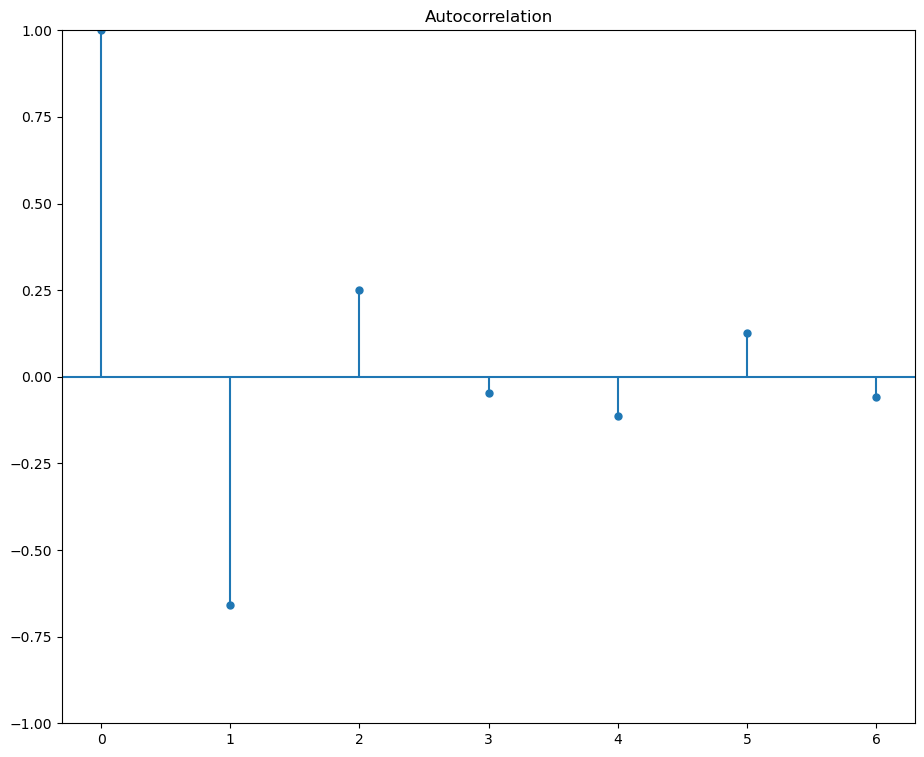

In [37]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data, alpha=None)
plt.show()

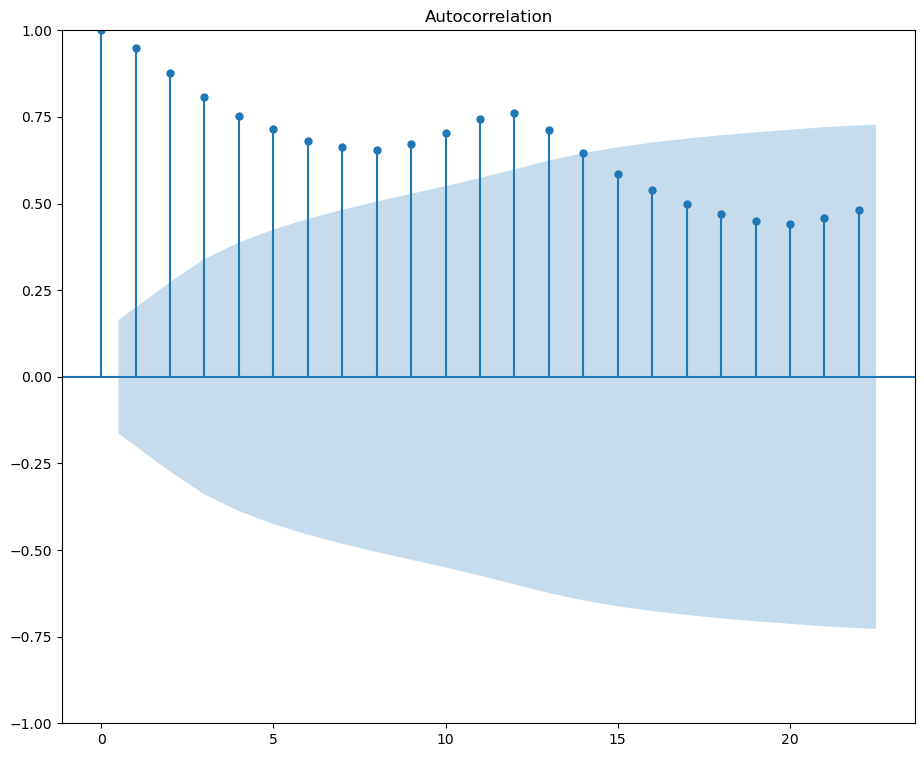

In [39]:
plot_acf(passengers)
plt.show()

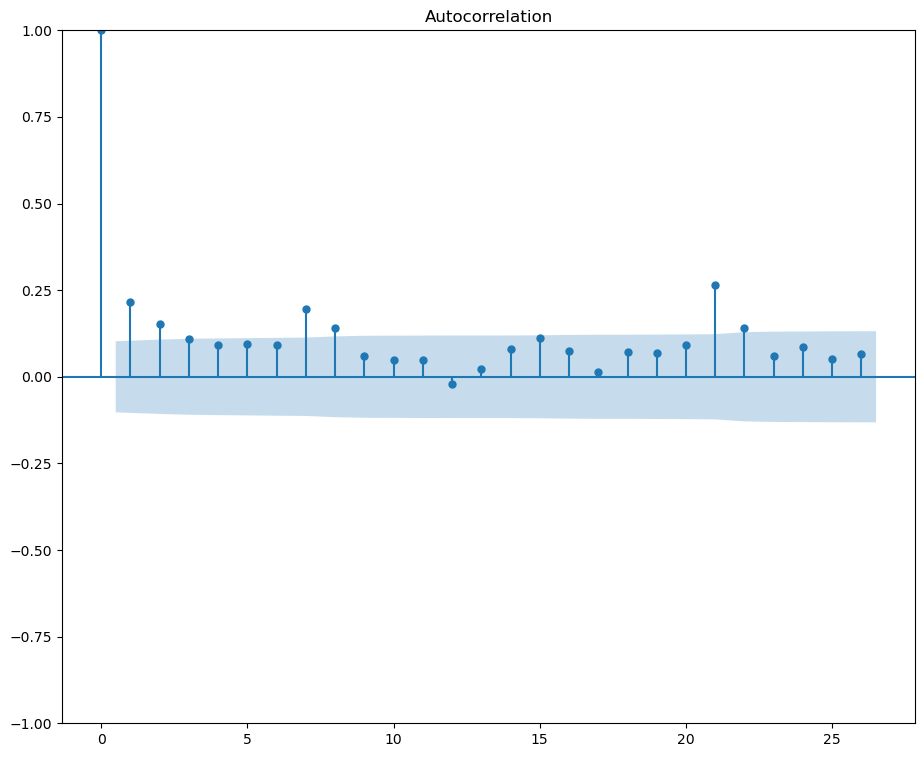

In [40]:
plot_acf(births)
plt.show()

In [98]:
# первое значение совпадает со значением временного ряда

all_ = []
# в цикле for последовательно применяем формулу ко всем элементам ряда
for alpha in [0.1, 0.4, 0.6, 0.7]:
    exp_smoothing = [births['Births'][0]]
    for i in range(1, len(births['Births'])):       
        exp_smoothing.append(alpha * births['Births'][i] + (1 - alpha) * exp_smoothing[i - 1])
    all_.append(exp_smoothing)
# выведем прогнозное значение для 366-го дня (1 января 1960 года)

[[35,
  34.7,
  34.230000000000004,
  33.907000000000004,
  34.91630000000001,
  34.324670000000005,
  35.39220300000001,
  36.15298270000001,
  36.33768443000001,
  35.40391598700001,
  35.66352438830001,
  35.39717194947001,
  37.357454754523005,
  38.32170927907071,
  38.98953835116364,
  38.790584516047275,
  39.91152606444255,
  40.22037345799829,
  40.29833611219846,
  41.46850250097862,
  40.72165225088076,
  41.94948702579268,
  41.65453832321341,
  40.68908449089207,
  40.32017604180287,
  40.58815843762258,
  40.429342593860326,
  39.8864083344743,
  40.29776750102687,
  40.06799075092418,
  38.46119167583176,
  36.915072508248585,
  36.32356525742373,
  37.091208731681355,
  37.18208785851322,
  38.463879072661896,
  38.4174911653957,
  39.67574204885614,
  38.80816784397052,
  38.027351059573476,
  39.32461595361613,
  38.992154358254524,
  39.59293892242907,
  40.73364503018617,
  40.06028052716755,
  41.2542524744508,
  41.828827227005725,
  42.145944504305156,
  42.53135

In [99]:
# посмотрим на количество фактических и прогнозных значений
len(births), len(all_)

(365, 4)

In [100]:
births['Exp_smoothing_0.1'] = all_[0]
births['Exo_smoothing_0.4'] = all_[1]
births['Exp_smoothing_0.6'] = all_[2]
births['Exo_smoothing_0.7'] = all_[3]
births.tail(3)

,Births,Exp_smoothing_0.1,Exo_smoothing_0.4,Exp_smoothing_0.6,Exo_smoothing_0.7
Date,,,,,
1959-12-29,48,42.826565,45.372916,47.215377,47.837359
1959-12-30,55,44.043908,49.223749,51.886151,52.851208
1959-12-31,50,44.639517,49.534250,50.754460,50.855362


In [101]:
# теперь нам нужно сдвинуть второй столбец на один день вперед (ведь это прогноз)

# вначале создадим индекс за 1 января

# для этого импортируем класс timedelta
from datetime import timedelta

# возьмём последний индекс (31 декабря 1959 года)
last_date = births.iloc[[-1]].index

# # "прибавим" один день
last_date = last_date + timedelta(days = 1)
last_date

DatetimeIndex(['1960-01-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [108]:
data = {'Exp_smoothing_0.1':all_[0][-1],
        'Exp_smoothing_0.4':all_[1][-1],
        'Exp_smoothing_0.6':all_[2][-1],
        'Exo_smoothing_0.7':all_[3][-1]
       }

In [109]:
data

{'Exp_smoothing_0.1': 44.6395172788343,
 'Exp_smoothing_0.4': 49.5342496361075,
 'Exp_smoothing_0.6': 50.754460299722055,
 'Exo_smoothing_0.7': 50.85536231800552}

In [110]:
births = births.append(pd.DataFrame(data, index = last_date))

In [111]:
births.tail()

,Births,Exp_smoothing_0.1,Exo_smoothing_0.4,Exp_smoothing_0.6,Exo_smoothing_0.7,Exp_smoothing_0.4
Date,,,,,,
1959-12-29,48.0,42.826565,45.372916,47.215377,47.837359,NaN
1959-12-30,55.0,44.043908,49.223749,51.886151,52.851208,NaN
1959-12-31,50.0,44.639517,49.534250,50.754460,50.855362,NaN
1960-01-01,NaN,44.639517,49.534250,50.754460,50.855362,NaN
1960-01-01,NaN,44.639517,NaN,50.754460,50.855362,49.53425


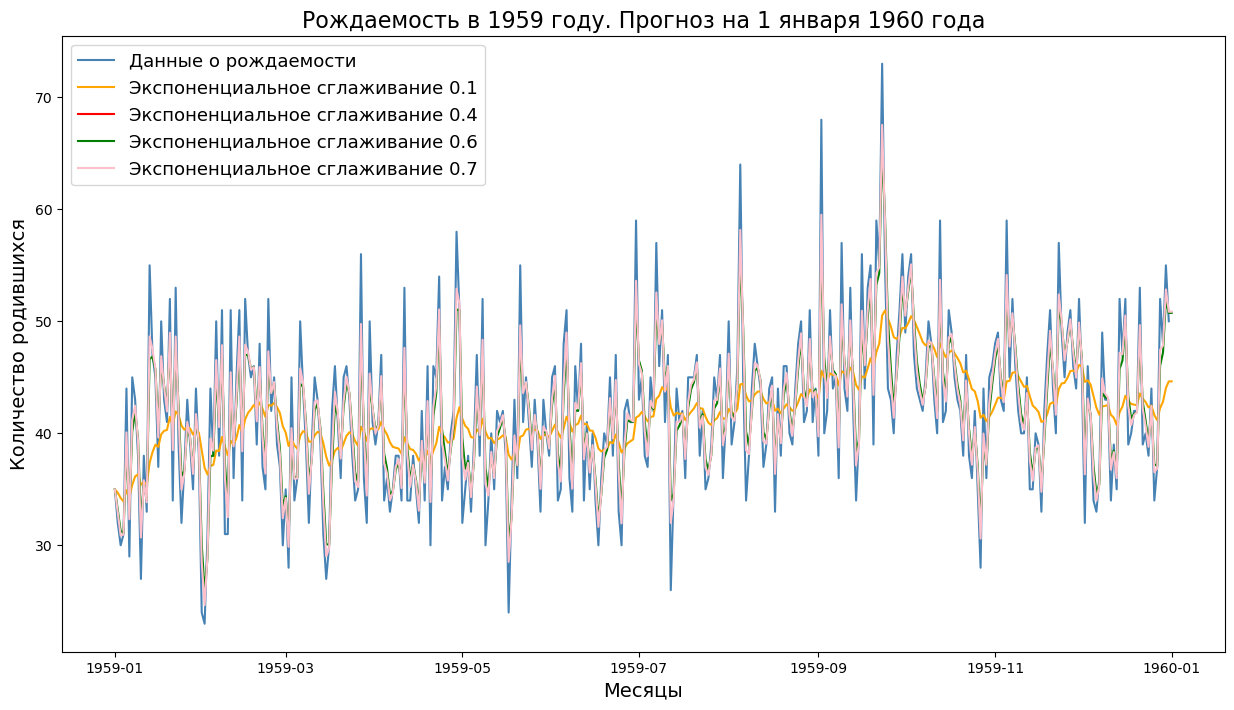

In [118]:
plt.figure(figsize=(15,8))

plt.plot(births['Births'], label = 'Данные о рождаемости', color = 'steelblue')
plt.plot(births['Exp_smoothing_0.1'], label = 'Экспоненциальное сглаживание 0.1', color = 'orange')
plt.plot(births['Exp_smoothing_0.4'], label = 'Экспоненциальное сглаживание 0.4', color = 'red')
plt.plot(births['Exp_smoothing_0.6'], label = 'Экспоненциальное сглаживание 0.6', color = 'green')
plt.plot(births['Exo_smoothing_0.7'], label = 'Экспоненциальное сглаживание 0.7', color = 'pink')
plt.legend(title = '', loc = 'upper left', fontsize = 13)

plt.ylabel('Количество родившихся', fontsize = 14)
plt.xlabel('Месяцы', fontsize = 14)
plt.title('Рождаемость в 1959 году. Прогноз на 1 января 1960 года', fontsize = 16)

plt.show()


In [114]:
# разобьём данные на обучающую и тестовую выборки

# обучающая выборка будет включать данные до декабря 1959 года включительно
train = passengers[:'1959-12']

# тестовая выборка начнется с января 1960 года (по сути, один год)
test = passengers['1960-01':]

In [58]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


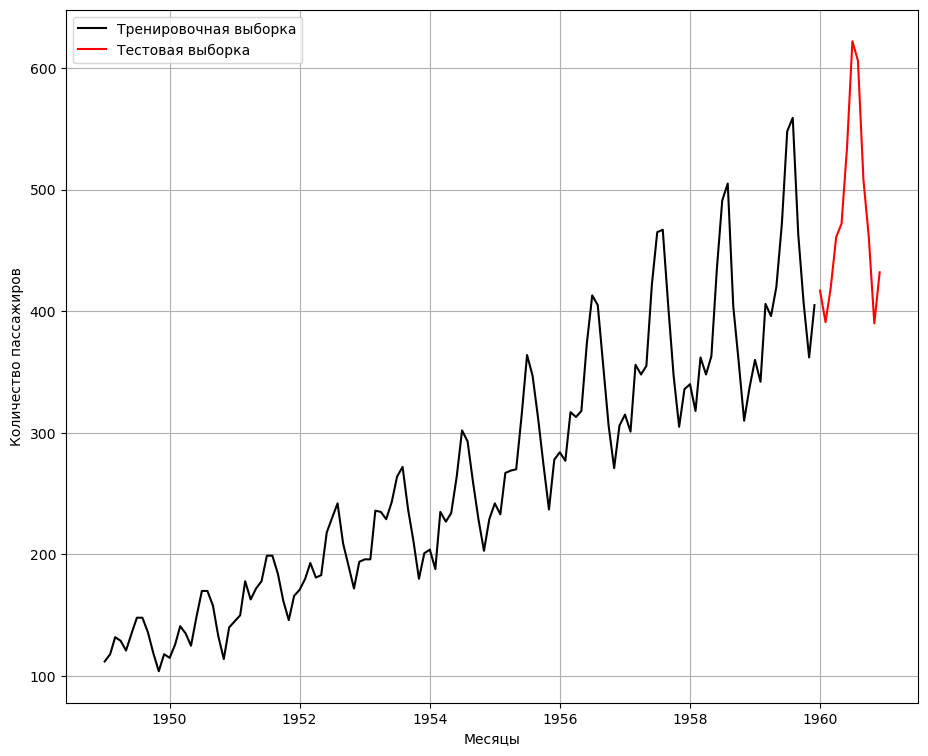

In [64]:
plt.plot(train, color = 'black', label = 'Тренировочная выборка')
plt.plot(test, color = 'red', label = 'Тестовая выборка')
plt.legend(loc = 'upper left')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
plt.grid()
plt.show()

In [65]:
import warnings
warnings.simplefilter(action='ignore', category = Warning)

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
model = SARIMAX(train,
                order=(3, 0, 0),
                seasonal_order=(0, 1, 0, 12))
result = model.fit()

In [67]:
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -451.953
Date:                            Fri, 11 Aug 2023   AIC                            911.907
Time:                                    16:55:17   BIC                            923.056
Sample:                                01-01-1949   HQIC                           916.435
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7603      0.088      8.672      0.000       0.588       0.932
ar.L2          0.2875      0.133   

In [70]:
start = len(train)
end = len(train) + len(test) - 1

In [71]:
pred = result.predict(start, end)

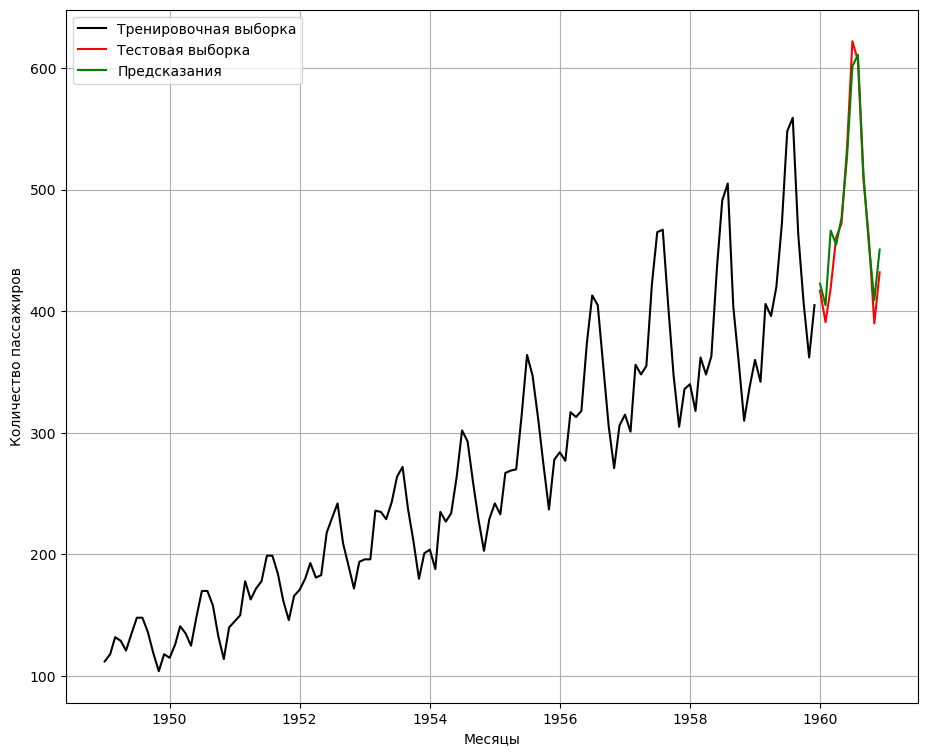

In [73]:
plt.plot(train, color = 'black', label = 'Тренировочная выборка')
plt.plot(test, color = 'red', label = 'Тестовая выборка')
plt.plot(pred, color = 'green', label = 'Предсказания')
plt.legend(loc = 'upper left')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
plt.grid()
plt.show()

In [74]:
start = len(passengers)
end = start - 1 + 3 * 12

In [75]:
forecast = result.predict(start, end)

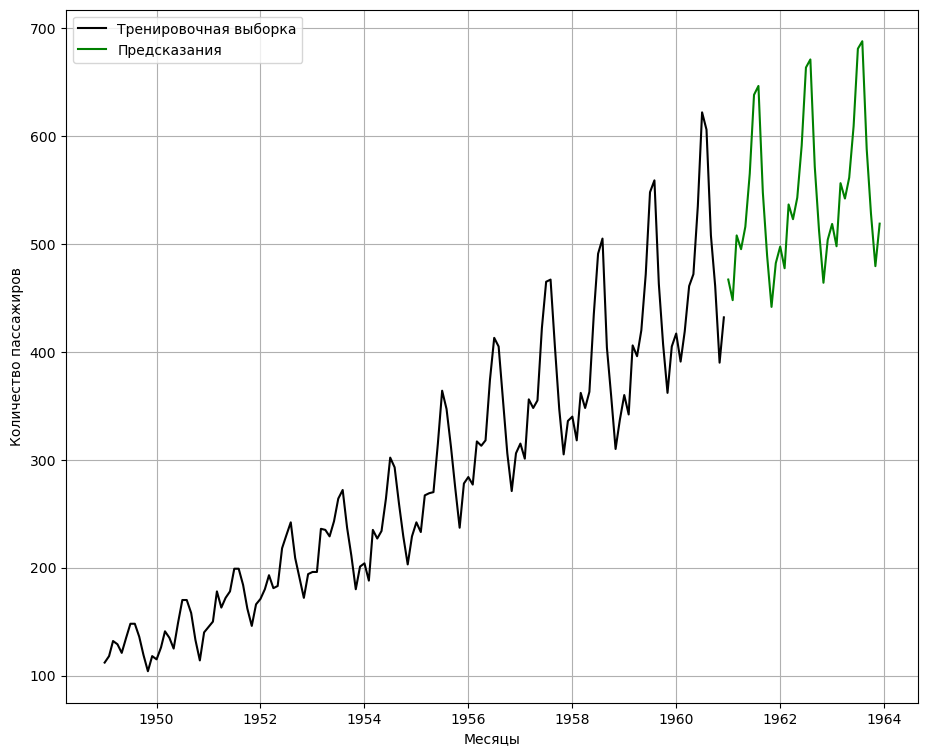

In [78]:
plt.plot(passengers, color = 'black', label = 'Тренировочная выборка')
plt.plot(forecast, color = 'green', label = 'Предсказания')
plt.legend(loc = 'upper left')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
plt.grid()
plt.show()